In [1]:
import pySULI_refiner as rf
import os
import sys
import xarray as xr

In [2]:

# Assuming notebook and data folder are here.
here = '/Users/petermeshkov/Repos/pySULI-Lib/example_data'
example_data_path = 'xrd_refinement_with_gsas2/'

os.chdir('%s/%s'%(here,example_data_path))
print(os.listdir())
print(os.getcwd())

os.makedirs('gsas2_scratch',exist_ok=True)
with open("gsas2_scratch/gsas.instprm", "w+") as f:
    f.write("""#GSAS-II instrument parameter file; do not add/delete items!
    Type:PXC
    Bank:1.0
    Lam:0.1824
    Polariz.:7.277695011573669
    Azimuth:0.0
    Zero:-0.00025200085768731445
    U:129.15268004188428
    V:1.816645496453032
    W:0.43034683098418736
    X:-0.0661572816525536
    Y:-0.9270864296622138
    Z:0.02775503495558348
    SH/L:0.002""")

['gsas.instprm', 'Ceo2.cif', 'gsas2_scratch', 'Pt.cif', 'Zr.cif', 'Pt.gpx', 'LaB6.nc', 'LaB6.cif', 'ZrH.nc', 'Zr-H1.66.cif', 'Background.nc', 'ZrH.gpx', 'Pt.nc', 'LaB6.gpx']
/Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2


In [3]:

def refinement_recipe(refiner,update_instprm=True):

    refiner.refine_background(num_coeffs=2,set_to_false=True)
    refiner.set_LeBail(LeBail=True)
    refiner.refine_cell_params(set_to_false=True)
    # refine_size_broadening(gpx,set_to_false=True)
    # refine_strain_broadening(gpx,set_to_false=True)

    for par in ['U', 'V', 'W']:
        refiner.refine_inst_parameters(inst_pars_to_refine=[par])
    for par in ['X', 'Y', 'Z']:
        refiner.refine_inst_parameters(inst_pars_to_refine=[par])
    for par in ['Zero']:
        refiner.refine_inst_parameters(inst_pars_to_refine=[par])
    if update_instprm:
        refiner.instprm_updater()
        
    refiner.get_gpx().save

    refiner.refine_background(num_coeffs=10,set_to_false=True)
    refiner.refine_cell_params(set_to_false=True)

    return refiner.get_gpx()

In [4]:

with xr.open_dataset('Background.nc') as ds:
    da_input_bkg = ds.i2d.mean(dim='azimuthal')

In [5]:

LaB6_refiner = rf.Refiner(
    nc_path = 'LaB6.nc',
    phases = [{'cif_abs_path':'LaB6.cif','phase_name':'LaB6','scale':1},],
    gsas2_scratch = 'gsas2_scratch',
    q_range = [0.5,4.1],
    GSASII_path = '/opt/anaconda3/envs/GSASII/GSAS-II/GSASII',
    da_input_bkg = da_input_bkg
)

GSAS-II binary directory: /opt/anaconda3/envs/GSASII/GSAS-II/GSASII-bin/mac_64_p3.11_n1.26
7 values read from config file /opt/anaconda3/envs/GSASII/GSAS-II/GSASII/config.py
GSASIIplot: wx not imported
ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build
<xarray.DataArray 'i2d' (radial: 1641)>
array([6.215274 , 6.058316 , 5.9654303, ..., 4.5684547, 4.556194 ,
       4.6175356], dtype=float32)
Coordinates:
  * radial   (radial) float32 0.1013 0.1037 0.1063 0.1088 ... 4.196 4.199 4.201
<xarray.DataArray 'i2d' (radial: 1440)>
array([7.2026753, 7.238541 , 7.249192 , ..., 4.278362 , 4.2941685,
       4.32508  ], dtype=float32)
Coordinates:
  * radial   (radial) float32 0.5013 0.5038 0.5063 0.5088 ... 4.094 4.096 4.099
ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs build

Import_Powder_Data: Error importing file /opt/anaconda3/envs/GSASII/GSAS-II/GSASII/imports/G2pwd_BrukerRAW.py
Error message: No module named 'wx'

ImportError for wx/mpl in GSASIIctrlGUI: ignore if docs bu

gpx file saved as /Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 3 variables:
initial chi^2 1.3151e+08 with 1440 obs.
Cycle 0: 0.02s, Chi**2: 132.96 for 1440 obs., Lambda: 0,  Delta: 1, SVD=0
Cycle 1: 0.02s, Chi**2: 132.96 for 1440 obs., Lambda: 0,  Delta: -2.14e-16, SVD=0
converged
Maximum shift/esd = 339.163 for all cycles
Read from file:/Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.bak0.gpx
Save to file  :/Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.gpx
GPX file save successful
 Refinement results are in file: /Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.lst
 ***** Refinement successful *****
gpx file saved as /Users/petermeshkov/Repos/pySULI-Lib/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.gpx



Background is refined: Rwp=6.

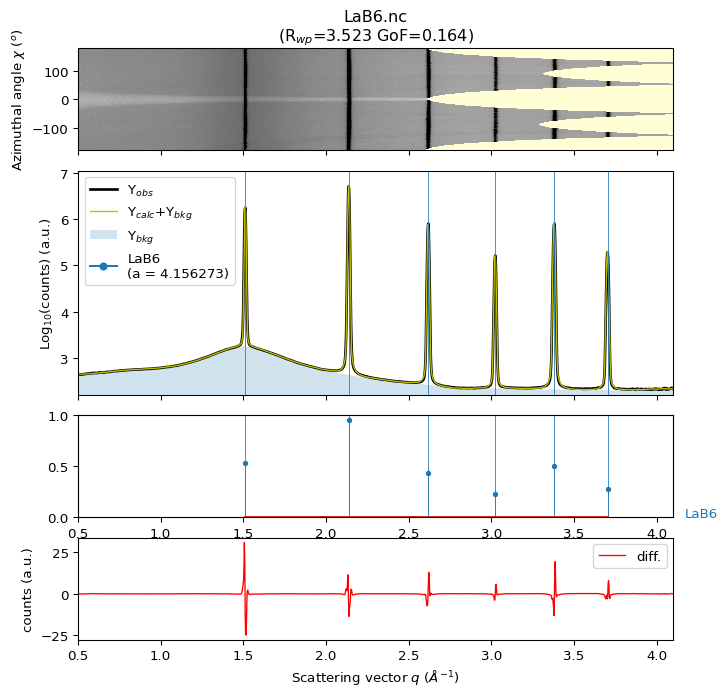

In [6]:
LaB6_refiner.refine(refinement_recipe)
LaB6_refiner.update_ds_file()
LaB6_refiner.update_gpx()
LaB6_refiner.plot_refinement_results()